## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['pdf.use14corefonts'] = True

#### roots and global variables

In [3]:
root = './'
datasets_root = root + 'Datasets/'
behavioural_data_root = datasets_root + 'behavioral_data/selected_data/' 
dataset_path = datasets_root + "/Models Results/fastText_FC.csv"

Loading words and non-words with zipf and predicted probabilities

In [4]:
word_nword_df = pd.read_csv(dataset_path,
                            header=None,
                            names =['string', 'freq',  'label', 'zipf',
                                    'category', 'word_prob', 'non_word_prob'])
word_nword_df.head()

,string,freq,label,zipf,category,word_prob,non_word_prob
0,Ipe's,0,0,0.000000,NW,6.484266e-08,1.000000
1,toothcamb,0,0,0.000000,NW,4.641062e-05,0.999954
2,flicks,702,1,2.935287,LF,9.993498e-01,0.000650
3,Samoar,0,0,0.000000,NW,1.966545e-06,0.999998
4,lastened,0,0,0.000000,NW,1.107923e-04,0.999889


In [5]:
# Reading LDT Data
behavioural_df = pd.read_csv(behavioural_data_root + 'LDT_data.csv',
                             header=None,
                             names=['accuracy', 'rt', 'string', 'response',
                                    'participant', 'minRT', 'participant_id'])
# Merging  behavioral dataframe with word_nonword_df to have words and non-words data with behavioral data
behavioural_df = pd.merge(behavioural_df, word_nword_df, on='string',
                          how='left').dropna().reset_index(drop=True)
behavioural_df = behavioural_df.drop(["freq", "participant"], axis=1)

In [6]:
behavioural_df.head()

,accuracy,rt,string,response,minRT,participant_id,label,zipf,category,word_prob,non_word_prob
0,1,0.394,cuts,1,0.394,1,1.0,4.058247,HF,1.000000,7.779031e-11
1,1,0.453,gear,1,0.394,1,1.0,4.204056,HF,1.000000,5.840910e-08
2,1,0.478,douthed,0,0.394,1,0.0,0.000000,NW,0.000028,9.999717e-01
3,1,0.489,cling,1,0.394,1,1.0,3.402424,HF,0.999999,1.267963e-06
4,1,0.494,kidding,1,0.394,1,1.0,5.125810,HF,0.996989,3.010578e-03


Predicted probabilities of words and non-words in different conditions in all trials
across participants

In [7]:
behavioural_df.groupby(['category']).agg({'word_prob': ['mean', 'std', 'count', 'max', 'min'],
                                          'non_word_prob': ['mean', 'std', 'count', 'max', 'min']})

word_prob                                          non_word_prob  \
              mean       std  count       max           min          mean   
category                                                                    
HF        0.995319  0.039131   7858  1.000000  1.009140e-01      0.004681   
LF        0.992126  0.055502   9803  1.000000  2.380394e-04      0.007874   
NW        0.011203  0.072430  19114  0.999938  2.486778e-11      0.988797   

                                                   
               std  count       max           min  
category                                           
HF        0.039131   7858  0.899086  4.211127e-27  
LF        0.055502   9803  0.999762  6.709425e-14  
NW        0.072430  19114  1.000000  6.199347e-05

RT and response description of words and non-words in different conditions in all trials
across participants

In [8]:
behavioural_df.groupby(['category']).agg({'rt': ['mean', 'std', 'max', 'min'],
                                          'response': ['mean', 'std']})

rt                          response          
              mean       std    max    min      mean       std
category                                                      
HF        0.685201  0.267732  2.996  0.203  0.945533  0.226951
LF        0.818866  0.335181  2.990  0.200  0.809446  0.392758
NW        0.851828  0.336423  3.000  0.200  0.133044  0.339631

In [9]:
words = behavioural_df.loc[behavioural_df['category']!='NW'].copy()
words['response'].replace([1, 0], ["Word", "Non Word"], inplace=True)

RT and Zipf relation in of all word trials

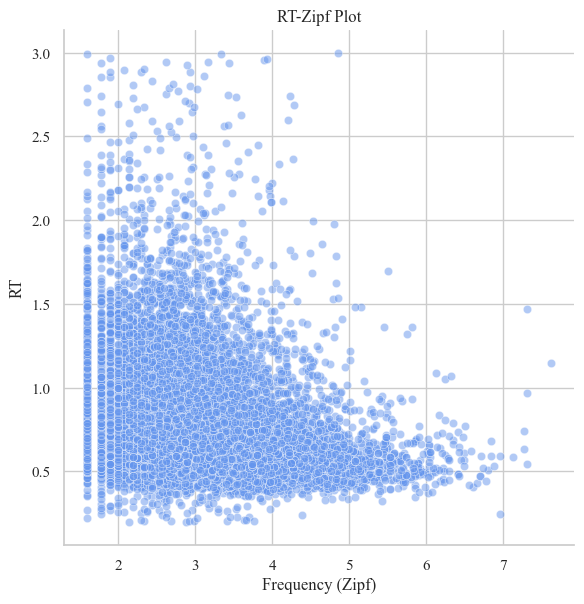

In [10]:
g = sns.relplot(x='zipf', y='rt', alpha=.5, height=6,
                data=words, color='cornflowerblue')
plt.title("RT-Zipf Plot")
g.set_xlabels("Frequency (Zipf)")
g.set_ylabels("RT")

RT and Zipf relation in all word trials for participants' word response and nonword response

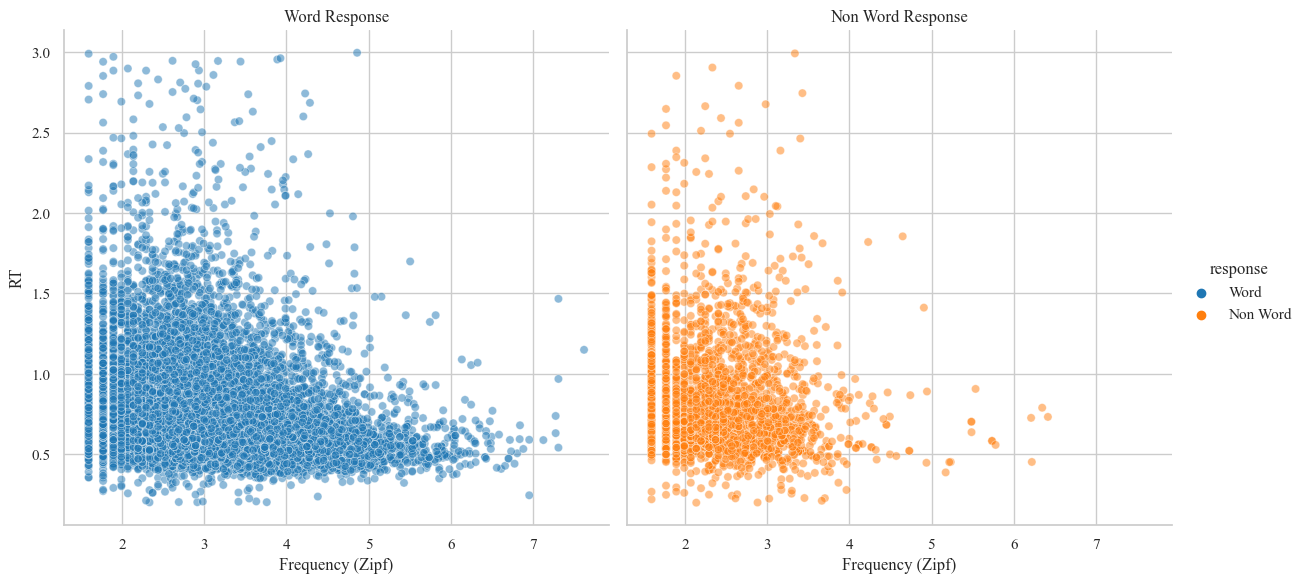

In [11]:
g = sns.relplot(x='zipf', y='rt', hue='response',
                col='response', alpha=.5, palette='tab10',
                height=6, data=words)

g.set_titles("{col_name} Response")
g.set_xlabels("Frequency (Zipf)")
g.set_ylabels("RT")